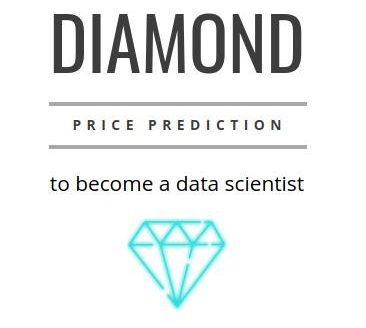

# About data
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
# get basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
df.drop(columns='Id',axis=1,inplace=True)

In [ ]:
# check nulls
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#There no missing values

In [ ]:
# categorical data in data frame are
object_features = df.select_dtypes(include=['object'])
print("Object Features:\n", object_features.columns)

# Identify continuous (numerical) features
continuous_features = df.select_dtypes(include=['int64', 'float64'])
print("\nContinuous Features:\n", continuous_features.columns)

Object Features:
 Index(['cut', 'color', 'clarity'], dtype='object')

Continuous Features:
 Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


## Study categorical data

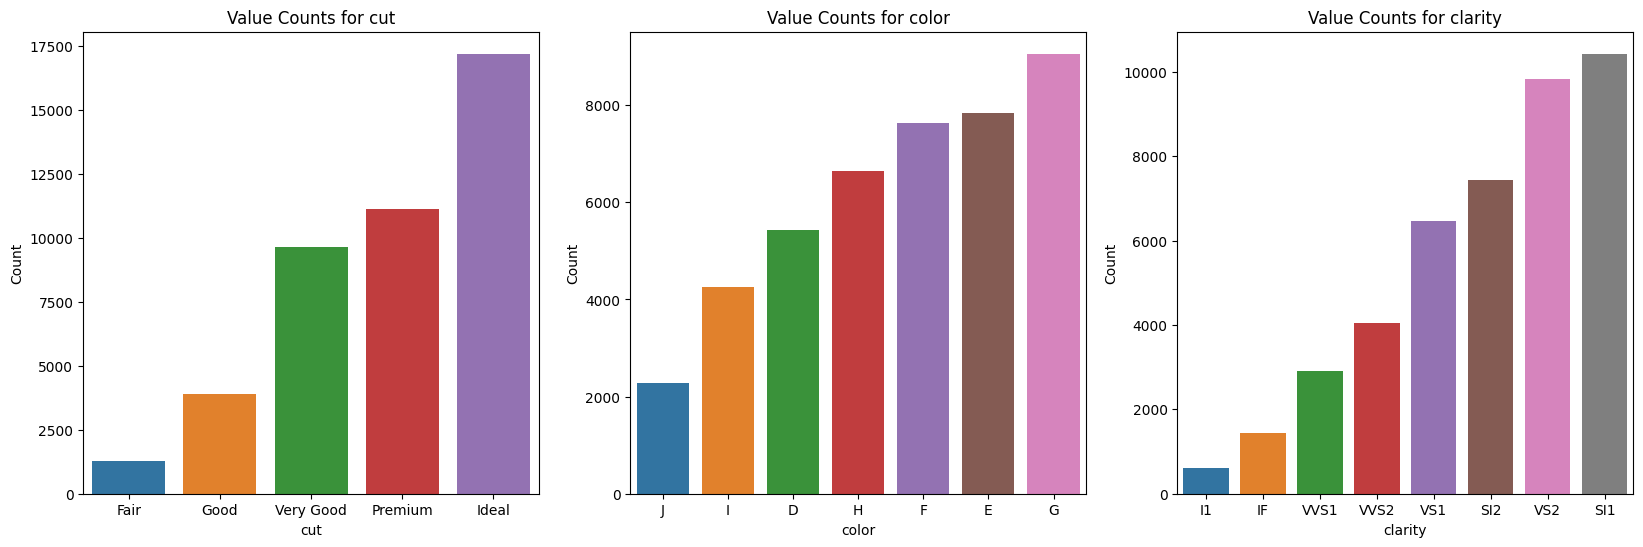

In [ ]:
categorical_columns = object_features.columns

# Set up the plotting layout
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_columns):
    sorted_counts = df[col].value_counts().sort_values(ascending=True)
    sns.barplot(x=sorted_counts.index,y=sorted_counts, ax=axes[i])
    axes[i].set_title(f'Value Counts for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Display the plots
plt.show()

In [ ]:
for i in range(len(categorical_columns)):
  print(categorical_columns[i])
  print(df[categorical_columns[i]].value_counts())
  print()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64



In [ ]:
# cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# colour, from J (worst) to D (best) DEFGHIJ
# clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

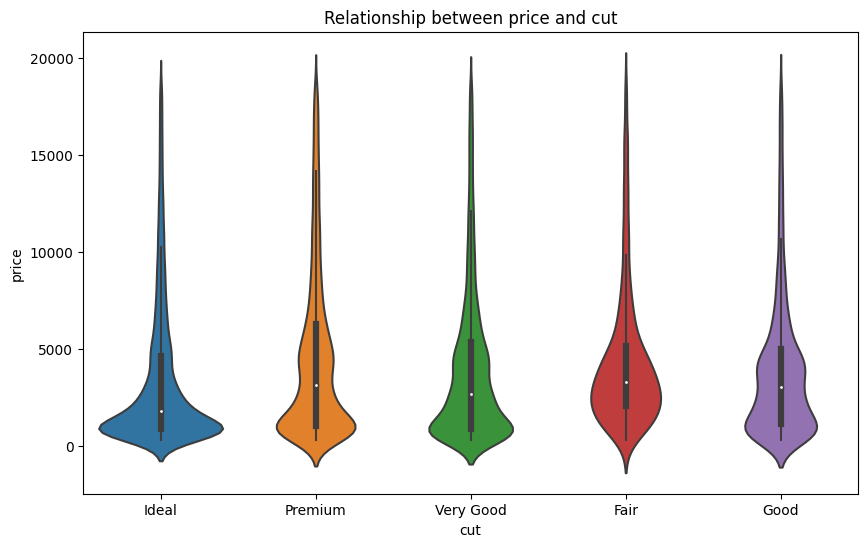

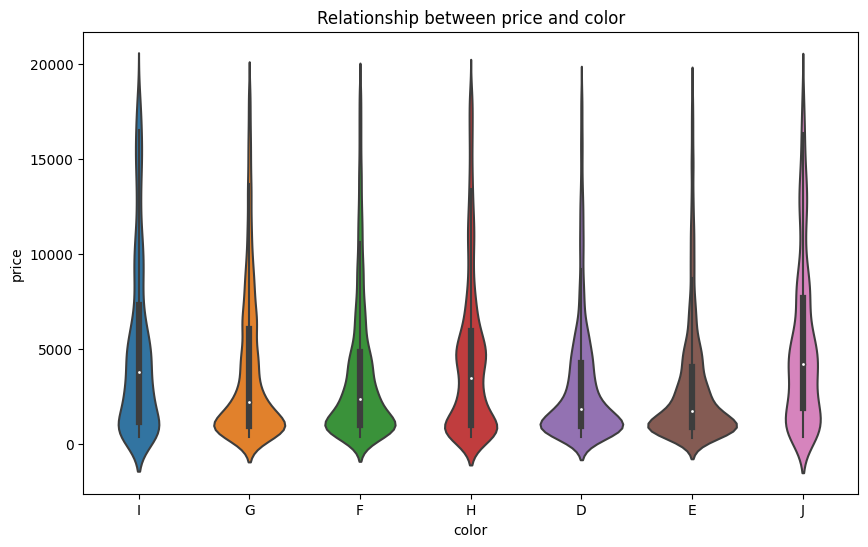

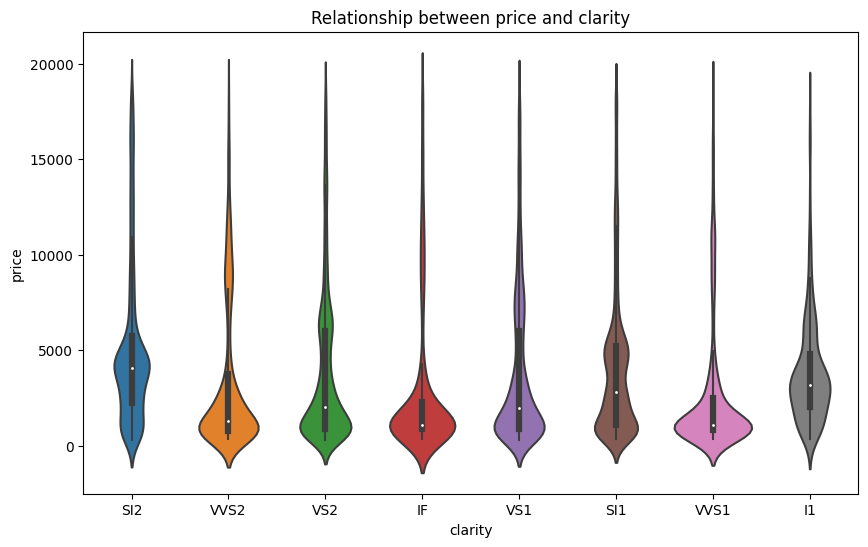

In [ ]:
# find relation between the categorical data and the Target (Price)

target = 'price'

for i in range(len(categorical_columns)):
  categorical_feature = categorical_columns[i]
  # Create a box plot to visualize the relationship
  plt.figure(figsize=(10, 6))
  sns.violinplot(x=categorical_feature, y=target, data=df)

  # Configure the plot labels and title
  plt.title(f'Relationship between {target} and {categorical_feature}')
  plt.xlabel(categorical_feature)
  plt.ylabel(target)

  # Display the plot
  plt.show()

In [ ]:
# why violin?
# there a lot of outliers the boxplot not give a clear relations between the categorical features and the target

# also, applying log at the "price"-> Target, will make better result on boxplot as below

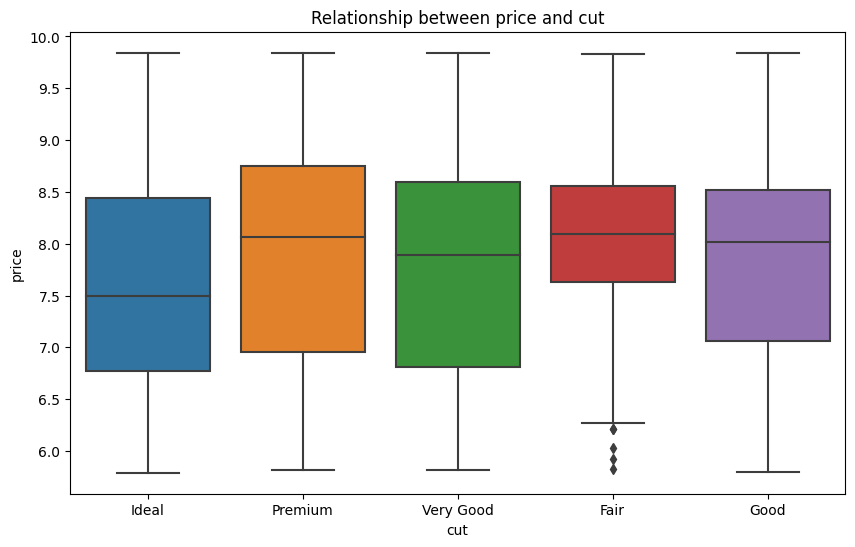

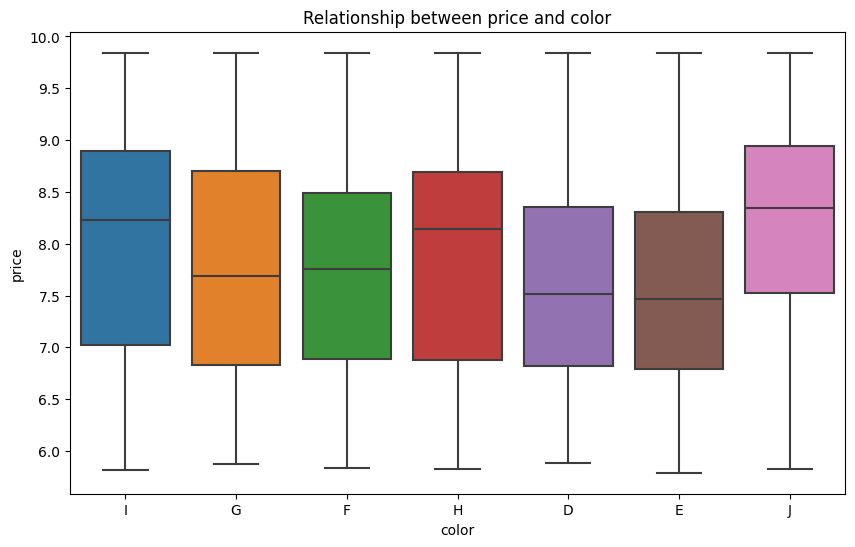

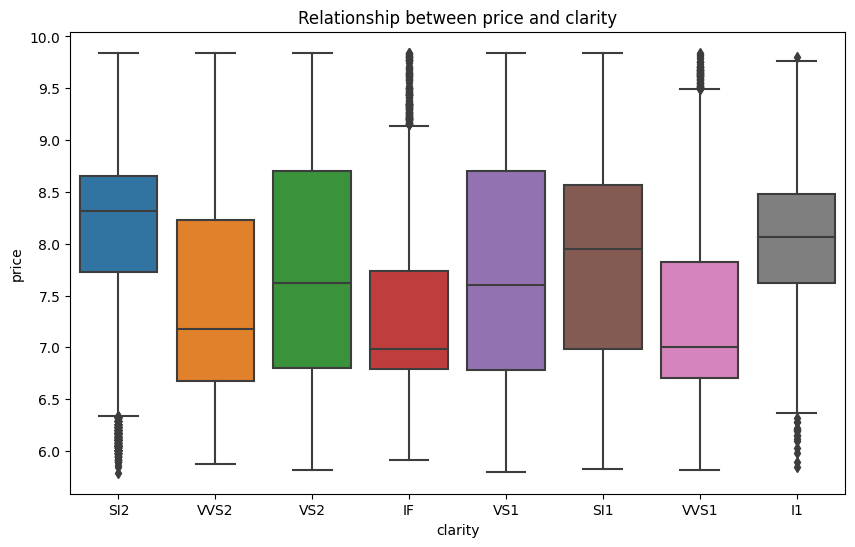

In [ ]:
df[target + '_log'] = np.log1p(df[target])

for i in range(len(categorical_columns)):
  categorical_feature = categorical_columns[i]
  # Create a box plot to visualize the relationship
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=categorical_feature, y=target+ '_log', data=df)

  # Configure the plot labels and title
  plt.title(f'Relationship between {target} and {categorical_feature}')
  plt.xlabel(categorical_feature)
  plt.ylabel(target)

  # Display the plot
  plt.show()



### cut and price
From the preceding, let us first deep dive into the relationship between the price and the cut.
The min and max values are the same for each category.
The fair, good, and very good have approximately the same median price, which is larger than the ideal median price.
The larger median price for the premium category
For that, the relationship given
premium price > Fair = very good = good > ideal

### color and price
From the given data, the color sorting is DEFGHIJ, D is the better, and J the worst.
But from the boxplot, the result is surprising!
All colors get the same min and max values.
The median price sorting is as follows: 
I=J > H > G=F > D=E
The best colors get min median price!
From the research on D (colorless), this may lead to unbuying it and preferring other colored diamonds, which may make them more expensive.

### clarity and price
All clarity gets the same min and max values.
The median price sorting is as follows: 
SI2 > SI1 = I1 > VS2 = VS1 > VVS2 > IF = VVS1
The best clarity gets a minimum median price!
This may lead to unbuying it and preferring other colored diamonds, which may make them more expensive.


note: clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))



## corre
check the correlation using Eta-Squared

In [ ]:
from scipy.stats import f_oneway

# Define the continuous target and categorical features
target = 'price'

# Calculate Eta-Squared for each categorical feature
for categorical_feature in categorical_columns:
    groups = df.groupby(categorical_feature)[target].apply(list)
    f_value, p_value = f_oneway(*groups)
    eta_squared = f_value / (f_value + (groups.size - 1))
    print(f"Eta-Squared for {categorical_feature} and {target}: {eta_squared:.4f}")


Eta-Squared for cut and price: 0.9739
Eta-Squared for color and price: 0.9747
Eta-Squared for clarity and price: 0.9614


## continuous data

In [ ]:
continuous_features

,carat,depth,table,price,x,y,z
0,1.06,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,61.3,56.0,828,4.43,4.41,2.71
3,0.53,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...
43147,0.52,61.5,56.0,1760,5.16,5.18,3.18
43148,0.72,62.1,59.0,3016,5.70,5.73,3.55
43149,0.44,61.5,58.0,990,4.95,4.87,3.02
43150,0.31,60.2,58.0,734,4.38,4.43,2.65


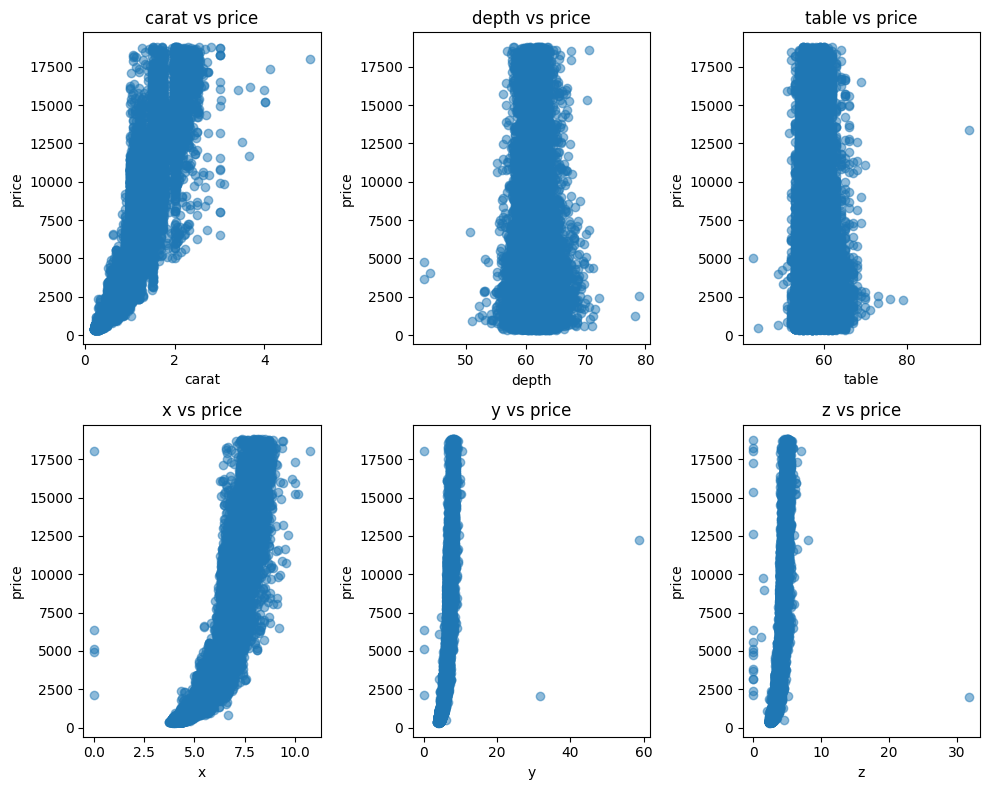

In [ ]:
target = 'price'

# Get the column names, excluding the specified target column
continuous_features = [column for column in continuous_features if column != target]

# Create scatter plots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
axes = axes.ravel()

for index, feature in enumerate(continuous_features):
    axes[index].scatter(df[feature], df[target], alpha=0.5)
    axes[index].set_xlabel(feature)
    axes[index].set_ylabel(target)
    axes[index].set_title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()

The correlation look like exponantial 
Take log for the price make the relation more linear

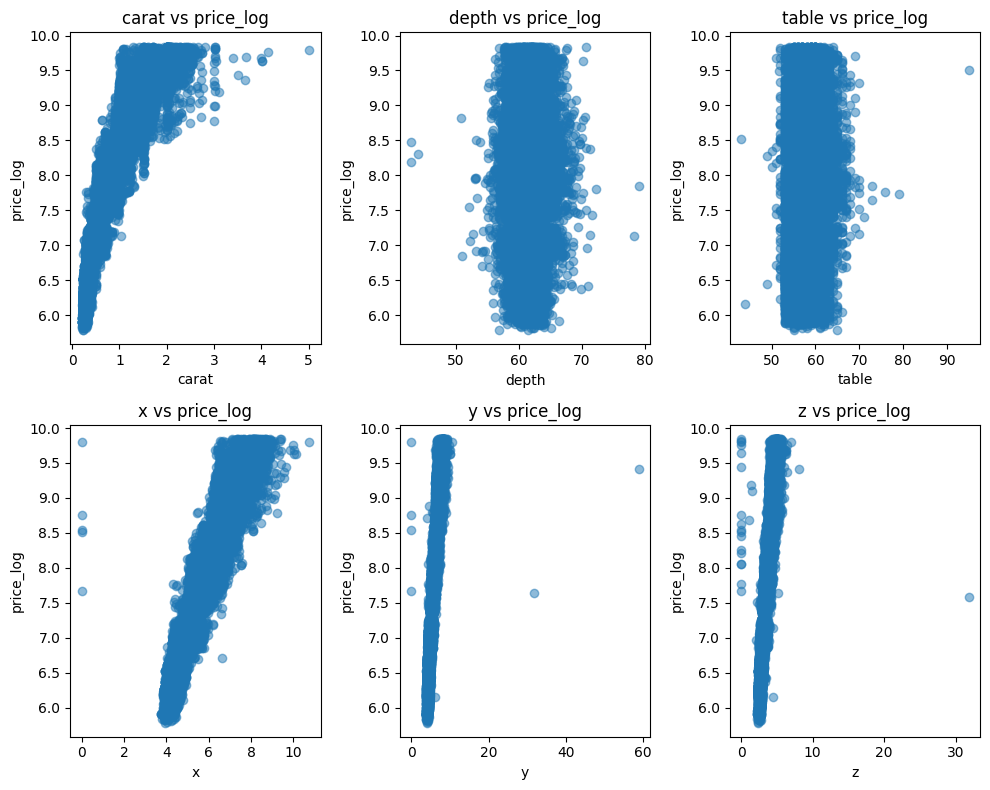

In [ ]:
target = 'price_log'

# Get the column names, excluding the specified target column
continuous_features = [column for column in continuous_features if column != target]

# Create scatter plots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
axes = axes.ravel()

for index, feature in enumerate(continuous_features):
    axes[index].scatter(df[feature], df[target], alpha=0.5)
    axes[index].set_xlabel(feature)
    axes[index].set_ylabel(target)
    axes[index].set_title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()

This mean there a relation, but its not linear, its a polynomial relation

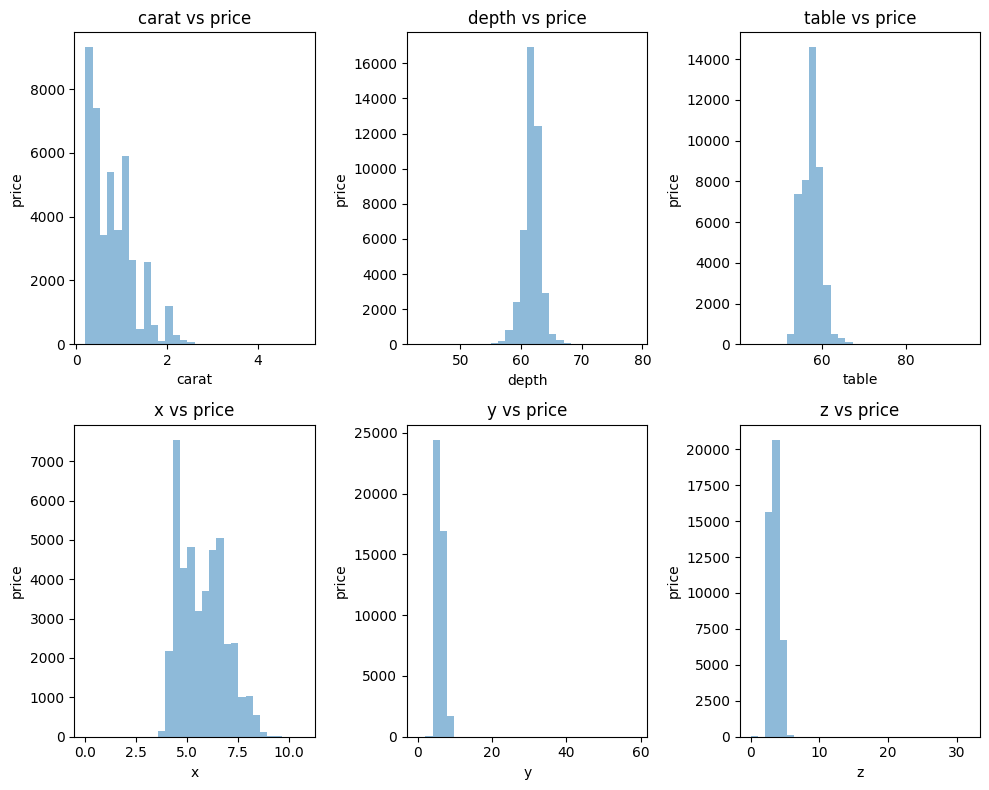

In [ ]:
target = 'price'

# Get the column names, excluding the specified target column
continuous_features = [column for column in continuous_features if column != target]

# Create scatter plots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
axes = axes.ravel()

for index, feature in enumerate(continuous_features):
    axes[index].hist(df[feature], bins=30, alpha=0.5)
    axes[index].set_xlabel(feature)
    axes[index].set_ylabel(target)
    axes[index].set_title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()

the data have a good distrubution, but the carat skewed to the left, the log scale can process this problem

y and z also, have bad distrubution too

In [ ]:
target = 'price'

# Get the column names, excluding the specified target column
continuous_features = [column for column in df.columns if column != target]

# Calculate Pearson, Spearman, and Kendall correlation coefficients
pearson_corr = df[continuous_features].corrwith(df[target], method='pearson')
spearman_corr = df[continuous_features].corrwith(df[target], method='spearman')
kendall_corr = df[continuous_features].corrwith(df[target], method='kendall')

# Sort the results
sorted_pearson_corr = pearson_corr.sort_values(ascending=False)
sorted_spearman_corr = spearman_corr.sort_values(ascending=False)
sorted_kendall_corr = kendall_corr.sort_values(ascending=False)

# Print the sorted results
print("Sorted Linear Correlation (Pearson) Coefficients:")
print(sorted_pearson_corr)
print("\nSorted Non-linear Correlation (Spearman) Coefficients:")
print(sorted_spearman_corr)
print("\nSorted Non-linear Correlation (Kendall) Coefficients:")
print(sorted_kendall_corr)



Sorted Linear Correlation (Pearson) Coefficients:
carat        0.921911
price_log    0.895943
x            0.885181
y            0.861354
z            0.857665
table        0.128501
depth       -0.013137
dtype: float64

Sorted Non-linear Correlation (Spearman) Coefficients:
price_log    1.000000
x            0.963115
carat        0.962734
y            0.962694
z            0.956849
table        0.173652
depth        0.007006
dtype: float64

Sorted Non-linear Correlation (Kendall) Coefficients:
price_log    1.000000
carat        0.833884
x            0.830239
y            0.829172
z            0.818752
table        0.123060
depth        0.003684
dtype: float64


<ipython-input-19-a4f8c1107f94>:7: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = df[continuous_features].corrwith(df[target], method='pearson')
<ipython-input-19-a4f8c1107f94>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = df[continuous_features].corrwith(df[target], method='spearman')
<ipython-input-19-a4f8c1107f94>:9: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kendall_corr = df[continuous_features].corrwith(df[target], method='

In [ ]:
continuous_features = df.select_dtypes(include=['int64', 'float64'])
continuous_features

,carat,depth,table,price,x,y,z,price_log
0,1.06,61.8,57.0,4270,6.57,6.60,4.07,8.359603
1,1.51,60.9,58.0,15164,7.38,7.42,4.51,9.626745
2,0.32,61.3,56.0,828,4.43,4.41,2.71,6.720220
3,0.53,61.2,56.0,1577,5.19,5.22,3.19,7.363914
4,0.70,61.0,57.0,2596,5.76,5.72,3.50,7.862112
...,...,...,...,...,...,...,...,...
43147,0.52,61.5,56.0,1760,5.16,5.18,3.18,7.473637
43148,0.72,62.1,59.0,3016,5.70,5.73,3.55,8.012018
43149,0.44,61.5,58.0,990,4.95,4.87,3.02,6.898715
43150,0.31,60.2,58.0,734,4.38,4.43,2.65,6.599870


<Axes: >

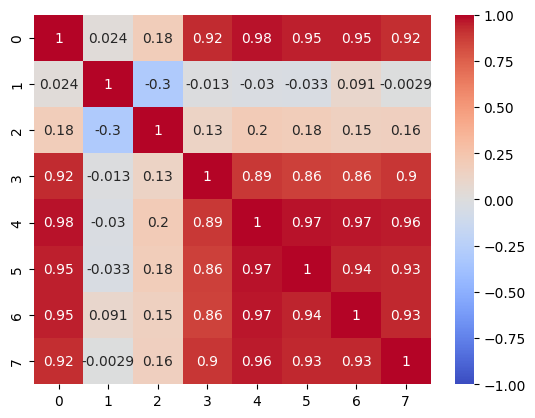

In [ ]:
corr_matrix = np.corrcoef(continuous_features, rowvar=False)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

All corr give same result

price_log    1.000000 -> its the same price (ignore)

carat        0.833884

x            0.830239

y            0.829172

z            0.818752

table        0.123060

depth        0.003684 -> very weak relation

## Summary

for the categorical data the corr is:

Eta-Squared for cut and price: 0.9739

Eta-Squared for color and price: 0.9747

Eta-Squared for clarity and price: 0.9614

This a very strong features the model can train on them 
(note that its not like expecatation this mean the ideal cut, the best color not in neseccery give best corr)

for continuos data

carat 0.833884

x 0.830239

y 0.829172

z 0.818752

table 0.123060

depth 0.003684 -> very weak relation -> can drop it



In [ ]:
# carat, x, y and z have a strong corr between each other (PCA), Feature extraction
# drop for 'deep' feature
# categorical ['cut', 'color', 'clarity'] -> use Label Encodeing 
# Z,Y -> Right skeness 
# Price -> Right skeness

# Basic model

In [ ]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 

In [ ]:
from pycaret.regression import *


In [ ]:
df.drop(columns='price_log',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
s = setup(df, target='price',normalize=True,normalize_method='minmax')


,Description,Value
0,Session id,1695
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 10)"
4,Transformed data shape,"(43152, 27)"
5,Transformed train set shape,"(30206, 27)"
6,Transformed test set shape,"(12946, 27)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


In [ ]:
s = setup(df, target='price',normalize=True,normalize_method='minmax')

best = compare_models()



,Description,Value
0,Session id,1173
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 10)"
4,Transformed data shape,"(43152, 27)"
5,Transformed train set shape,"(30206, 27)"
6,Transformed test set shape,"(12946, 27)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,295.3361,320050.6361,565.2512,0.9798,0.1125,0.0860,0.6340
et,Extra Trees Regressor,281.5789,322527.4414,567.6394,0.9796,0.0966,0.0698,12.1990
rf,Random Forest Regressor,284.0536,327831.0316,572.1943,0.9793,0.0964,0.0693,16.9170
xgboost,Extreme Gradient Boosting,294.5810,336479.4390,579.5978,0.9787,0.1048,0.0765,4.4940
gbr,Gradient Boosting Regressor,405.6805,547179.4731,739.0301,0.9655,0.2041,0.1288,3.9190
dt,Decision Tree Regressor,379.6375,607097.2644,778.9451,0.9616,0.1306,0.0906,0.5280
knn,K Neighbors Regressor,419.1104,788784.9091,886.2360,0.9502,0.1764,0.1201,0.6610
lr,Linear Regression,732.8452,1265152.1309,1123.6823,0.9201,0.5746,0.3853,0.8240
br,Bayesian Ridge,732.9435,1265188.4908,1123.7014,0.9201,0.5746,0.3855,0.3750
llar,Lasso Least Angle Regression,750.4188,1278005.3667,1129.6170,0.9193,0.5802,0.3957,0.2290


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:

finalize_model(best)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['carat', 'depth', 'table', 'x',
                                             'y', 'z'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['cut', 'color', 'clarity'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['cut', 'color', 'clarity'],
                                    transformer=OneHotEncoder(cols=['cut',
                                                                    'color',
                                                                    'clarity'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator', LGBMRegressor(random_state=1173))])

In [ ]:
test = pd.read_csv('/content/test.csv')
test.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [ ]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
test.drop(columns='Id',axis=1,inplace=True)

In [ ]:
# predict
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,293.7134,311244.9154,557.8933,0.9806,0.1135,0.0872


,carat,cut,color,clarity,depth,table,x,y,z,price,prediction_label
21558,1.07,Premium,F,SI2,62.400002,57.0,6.58,6.53,4.09,4573,4447.175050
18273,1.20,Very Good,G,SI2,61.500000,58.0,6.83,6.85,4.21,4443,5343.223788
39763,0.96,Ideal,F,SI2,60.900002,60.0,6.31,6.36,3.86,4500,4023.569586
31786,0.40,Very Good,E,SI1,62.900002,58.0,4.71,4.74,2.97,707,802.688665
22430,0.41,Very Good,F,VS2,62.599998,58.0,4.75,4.81,2.99,863,933.324511
...,...,...,...,...,...,...,...,...,...,...,...
30062,0.81,Ideal,J,VS1,62.299999,57.0,5.93,5.98,3.71,2626,2439.823498
2172,2.03,Ideal,G,SI2,62.599998,56.0,8.15,8.10,5.08,15717,15565.272398
14332,0.35,Ideal,F,VVS1,61.799999,55.0,4.53,4.57,2.81,945,982.133729
467,0.90,Fair,G,I1,66.000000,58.0,5.96,5.88,3.91,2310,1854.713208


In [ ]:
unseen_predictions = predict_model(best, data=test)
unseen_predictions.head()

,carat,cut,color,clarity,depth,table,x,y,z,prediction_label
0,0.34,Ideal,G,VVS2,61.099998,57.0,4.52,4.48,2.75,881.710541
1,0.71,Premium,E,VS2,62.700001,58.0,5.74,5.68,3.58,2888.859960
2,0.44,Very Good,I,VS1,62.799999,56.0,4.83,4.88,3.05,814.005237
3,0.81,Premium,E,SI2,60.099998,59.0,6.09,6.03,3.65,2870.527841
4,0.40,Ideal,G,VVS1,61.200001,56.0,4.74,4.80,2.92,1149.838873


In [ ]:
price_predictions = unseen_predictions['prediction_label']

In [ ]:
price_predictions_df = price_predictions.to_frame()


In [ ]:
price_predictions_df.to_csv('predicted_prices.csv', index=False)


## Tune the Model

In [ ]:
# From this results
# carat, x, y and z have a strong corr between each other (PCA), Feature extraction
# drop for 'deep' feature
# categorical ['cut', 'color', 'clarity'] -> use Label Encodeing 
# Z,Y -> Right skeness 
# Price -> Right skeness

In [ ]:
# 1) drop depth and retrun the model
# 2) PCA for x,y,z and caret
# 3) and make a LabelEncoding

In [ ]:
df_HP1 = df.copy()

In [ ]:
df_HP1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:

# Custom transformer for multiple columns
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = None

    def fit(self, X, y=None):
        self.encoders = {col: LabelEncoder().fit(X[col]) for col in self.columns}
        return self

    def transform(self, X):
        output = X.copy()
        for col in self.columns:
            output[col] = self.encoders[col].transform(X[col])
        return output

# Example dataset with diamond features

# 1) Drop the 'depth' column
df_HP1.drop('depth', axis=1, inplace=True)

# 2) PCA for 'x', 'y', 'z', and 'carat'
pca = PCA(n_components=1)

# 3) LabelEncoder for 'cut', 'color', 'clarity'
label_encoder = MultiColumnLabelEncoder(columns=['cut', 'color', 'clarity'])

# Create a custom pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('pca', pca, ['x', 'y', 'z', 'carat']),
        ('label_encoder', label_encoder, ['cut', 'color', 'clarity']),
    ],
    remainder='passthrough'
)

# Fit the pipeline to the training data
preprocessor.fit(df_HP1)

# Transform the training data using the pipeline
transformed_data = preprocessor.transform(df_HP1)

# Create a DataFrame from the transformed data
columns = ['pca_xyz_carat', 'cut', 'color', 'clarity', 'table', 'price']
transformed_data = pd.DataFrame(transformed_data, columns=columns)

print("Transformed data:\n", transformed_data)


Transformed data:
        pca_xyz_carat  cut  color  clarity  table    price
0           1.339737  2.0    5.0      3.0   57.0   4270.0
1           2.646543  3.0    3.0      7.0   58.0  15164.0
2          -2.088151  2.0    2.0      5.0   56.0    828.0
3          -0.865089  2.0    3.0      5.0   56.0   1577.0
4          -0.031834  3.0    4.0      7.0   57.0   2596.0
...              ...  ...    ...      ...    ...      ...
43147      -0.915452  2.0    1.0      5.0   56.0   1760.0
43148      -0.038412  4.0    0.0      5.0   59.0   3016.0
43149      -1.324126  3.0    5.0      6.0   58.0    990.0
43150      -2.132154  3.0    1.0      4.0   58.0    734.0
43151      -2.005147  2.0    3.0      5.0   55.0    743.0

[43152 rows x 6 columns]


In [ ]:
s_hp = setup(transformed_data, target='price')

s_hp = setup(transformed_data, target='price', normalize=True ,normalize_method='minmax')

best = compare_models()



,Description,Value
0,Session id,8999
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 6)"
4,Transformed data shape,"(43152, 6)"
5,Transformed train set shape,"(30206, 6)"
6,Transformed test set shape,"(12946, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,6457
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 6)"
4,Transformed data shape,"(43152, 6)"
5,Transformed train set shape,"(30206, 6)"
6,Transformed test set shape,"(12946, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,306.9395,360323.4784,599.3116,0.9773,0.1253,0.0924,0.6540
xgboost,Extreme Gradient Boosting,304.6238,366797.0500,604.8352,0.9769,0.1156,0.0865,1.7860
rf,Random Forest Regressor,311.7890,389045.8280,623.0483,0.9755,0.1214,0.0904,8.3520
et,Extra Trees Regressor,320.6450,413419.5825,642.3532,0.9740,0.1283,0.0944,5.3660
gbr,Gradient Boosting Regressor,384.4715,508133.1013,712.3626,0.9679,0.1787,0.1208,1.9960
dt,Decision Tree Regressor,393.9282,633566.8284,795.3098,0.9600,0.1551,0.1123,0.3000
knn,K Neighbors Regressor,495.3226,1048515.0812,1022.2441,0.9339,0.2028,0.1432,0.1670
ada,AdaBoost Regressor,1257.2101,2700118.8836,1640.5742,0.8298,0.5743,0.6820,1.1680
br,Bayesian Ridge,1278.4087,2951028.0750,1716.9474,0.8140,0.7419,0.6771,0.2690
lar,Least Angle Regression,1278.4414,2951028.1500,1716.9474,0.8140,0.7419,0.6772,0.1030


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
finalize_model(best)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['pca_xyz_carat', 'cut', 'color',
                                             'clarity', 'table'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator', LGBMRegressor(random_state=6457))])

In [ ]:
# predict
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,316.2393,379147.7353,615.7497,0.9761,0.1292,0.0950


,pca_xyz_carat,cut,color,clarity,table,price,prediction_label
19265,0.986449,2.0,3.0,2.0,57.0,5273.0,4801.481492
18673,-1.423923,2.0,4.0,7.0,55.0,943.0,989.500524
28227,1.145212,3.0,3.0,4.0,61.0,6552.0,6510.156875
38359,-2.254400,2.0,3.0,7.0,57.0,878.0,737.847015
5671,1.504926,3.0,4.0,2.0,58.0,5194.0,5295.064307
...,...,...,...,...,...,...,...
3391,1.458758,2.0,4.0,5.0,57.0,6045.0,6004.070398
40490,-2.088723,3.0,4.0,4.0,60.0,540.0,648.810544
34818,1.130321,2.0,5.0,4.0,57.0,4199.0,4969.510929
29148,-0.844867,2.0,6.0,2.0,55.0,999.0,1148.845883


# Tune 2

In [ ]:
df_HP2 = df.copy()

In [ ]:
df_HP2.drop(columns='depth',axis=1,inplace=True)

In [ ]:
s_hp2 = setup(df_HP2, target='price', normalize=True ,normalize_method='minmax')

best = compare_models()

,Description,Value
0,Session id,3282
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 9)"
4,Transformed data shape,"(43152, 26)"
5,Transformed train set shape,"(30206, 26)"
6,Transformed test set shape,"(12946, 26)"
7,Numeric features,5
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,292.1513,305734.0248,552.4684,0.9805,0.1121,0.0859,0.5960
et,Extra Trees Regressor,278.4470,310370.6813,556.6831,0.9802,0.0974,0.0699,11.5930
rf,Random Forest Regressor,279.9458,311768.9014,558.0302,0.9801,0.0958,0.0690,14.5260
xgboost,Extreme Gradient Boosting,290.1156,318123.4392,563.5791,0.9797,0.1024,0.0759,4.2640
gbr,Gradient Boosting Regressor,405.4803,532835.3264,729.6921,0.9660,0.2117,0.1305,3.5150
dt,Decision Tree Regressor,370.2434,569894.2300,754.2656,0.9637,0.1293,0.0896,0.3940
knn,K Neighbors Regressor,388.8112,711324.7992,842.3345,0.9547,0.1611,0.1078,0.9140
lr,Linear Regression,742.3344,1280815.2918,1131.0573,0.9184,0.5962,0.3921,0.4060
br,Bayesian Ridge,741.9561,1280465.7141,1130.9170,0.9184,0.5911,0.3921,0.3930
llar,Lasso Least Angle Regression,755.6772,1288846.5764,1134.8208,0.9179,0.5862,0.4001,0.2240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# predict
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,295.2701,330651.3762,575.0229,0.9798,0.1121,0.0862


,carat,cut,color,clarity,table,x,y,z,price,prediction_label
18158,0.54,Ideal,G,VS1,57.0,5.29,5.26,3.20,2274,1794.187226
18226,1.02,Ideal,J,VS2,58.0,6.45,6.49,3.95,4397,4303.519738
24221,1.54,Premium,H,VS2,60.0,7.47,7.45,4.50,9081,10665.587638
21285,0.90,Very Good,H,VVS1,57.0,6.02,6.07,3.84,4485,4511.726354
2016,1.00,Premium,D,VS1,58.0,6.46,6.42,3.93,7280,7800.683235
...,...,...,...,...,...,...,...,...,...,...
24055,0.30,Ideal,D,VS2,54.0,4.33,4.34,2.66,710,803.738377
32682,0.41,Good,F,VVS2,63.0,4.82,4.87,2.87,1150,1120.413565
42821,0.31,Ideal,F,VS2,56.0,4.39,4.36,2.72,749,730.738468
15796,1.51,Very Good,J,I1,57.0,7.31,7.23,4.60,4600,5799.450522


# Tune 3

In [ ]:
df_HP3 = df.copy()
df_HP3.drop(columns='depth',axis=1,inplace=True)

In [ ]:

# Custom label encoding
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Apply the custom label encoding
df_HP3_LE = pd.DataFrame(df_HP3)
df_HP3_LE['cut'] = df_HP3_LE['cut'].map(cut_mapping)
df_HP3_LE['color'] = df_HP3_LE['color'].map(color_mapping)
df_HP3_LE['clarity'] = df_HP3_LE['clarity'].map(clarity_mapping)


In [ ]:
df_HP3_LE.head()

,carat,cut,color,clarity,table,price,x,y,z
0,1.06,4,1,1,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,5,58.0,15164,7.38,7.42,4.51
2,0.32,4,4,3,56.0,828,4.43,4.41,2.71
3,0.53,4,3,3,56.0,1577,5.19,5.22,3.19
4,0.70,3,2,5,57.0,2596,5.76,5.72,3.50


In [ ]:
s_hp3 = setup(df_HP3_LE, target='price', normalize=True ,normalize_method='minmax')

best = compare_models()

,Description,Value
0,Session id,7613
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 9)"
4,Transformed data shape,"(43152, 9)"
5,Transformed train set shape,"(30206, 9)"
6,Transformed test set shape,"(12946, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,284.4764,298960.3521,545.2605,0.9814,0.1091,0.0830,0.7360
et,Extra Trees Regressor,274.5480,314095.7133,559.4834,0.9805,0.0944,0.0673,8.0470
rf,Random Forest Regressor,276.1252,316111.3655,561.3829,0.9804,0.0927,0.0664,10.0680
xgboost,Extreme Gradient Boosting,285.6766,320926.1915,565.2884,0.9801,0.0984,0.0732,1.9430
gbr,Gradient Boosting Regressor,342.3368,382834.1085,617.9588,0.9762,0.1637,0.1085,2.7220
knn,K Neighbors Regressor,356.1109,520843.2712,720.5685,0.9676,0.1321,0.0957,0.3570
dt,Decision Tree Regressor,371.6541,582477.6688,762.4094,0.9637,0.1276,0.0883,0.2370
ada,AdaBoost Regressor,850.7703,1302089.8602,1140.7090,0.9189,0.3872,0.3971,1.5310
br,Bayesian Ridge,808.7046,1478396.6943,1215.0705,0.9080,0.6483,0.4411,0.1160
lr,Linear Regression,808.6933,1478397.7940,1215.0710,0.9080,0.6482,0.4410,0.4830


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,279.9892,289285.7734,537.8529,0.9813,0.1069,0.0818


,carat,cut,color,clarity,table,x,y,z,price,prediction_label
39280,0.35,1,5,1,55.000000,4.45,4.49,2.86,454,543.915723
30962,0.42,3,5,1,58.000000,4.91,4.87,2.94,838,782.936973
353,0.33,2,5,6,53.000000,4.42,4.47,2.81,770,870.271530
30346,0.42,4,4,4,57.000000,4.78,4.83,2.95,1031,1080.394229
3848,0.58,2,1,6,57.000000,5.31,5.35,3.36,1790,1831.536768
...,...,...,...,...,...,...,...,...,...,...
11991,0.38,4,4,5,54.099998,4.66,4.68,2.90,1010,1041.482135
10016,1.56,2,0,2,58.000000,7.55,7.59,4.51,7424,7344.490358
30515,0.41,4,3,7,54.000000,4.77,4.82,2.99,1259,1244.538081
25409,0.42,4,2,4,57.000000,4.80,4.82,2.98,847,902.747544


In [ ]:
test_hp3=test.copy()
test_hp3.head()

test_hp3.drop(columns='depth',axis=1,inplace=True)

cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}


test_hp3_LE = pd.DataFrame(test_hp3)
test_hp3_LE['cut'] = test_hp3_LE['cut'].map(cut_mapping)
test_hp3_LE['color'] = test_hp3_LE['color'].map(color_mapping)
test_hp3_LE['clarity'] = test_hp3_LE['clarity'].map(clarity_mapping)

In [ ]:
test_hp3_LE.head()

,carat,cut,color,clarity,table,x,y,z
0,0.34,4,3,5,57.0,4.52,4.48,2.75
1,0.71,3,5,3,58.0,5.74,5.68,3.58
2,0.44,2,1,4,56.0,4.83,4.88,3.05
3,0.81,3,5,1,59.0,6.09,6.03,3.65
4,0.40,4,3,6,56.0,4.74,4.80,2.92


In [ ]:
unseen_predictions = predict_model(best, data=test_hp3_LE)
price_predictions = unseen_predictions['prediction_label']
price_predictions_df = price_predictions.to_frame()
price_predictions_df.to_csv('predicted_prices.csv', index=True)


# Tune 4

In [ ]:
!pip uninstall pycaret
!pip install pycaret


In [ ]:
!pip install optuna
!pip install pycaret[tuners]


In [ ]:
from pycaret.regression import *

In [ ]:
df_HP4 = df.copy()
df_HP4.drop(columns='depth',axis=1,inplace=True)

In [ ]:

# Custom label encoding
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Apply the custom label encoding
df_HP4_LE = pd.DataFrame(df_HP4)
df_HP4_LE['cut'] = df_HP4['cut'].map(cut_mapping)
df_HP4_LE['color'] = df_HP4['color'].map(color_mapping)
df_HP4_LE['clarity'] = df_HP4['clarity'].map(clarity_mapping)
df_HP4_LE['price'] = df_HP4['price'].apply(np.log)

In [ ]:
df_HP4_LE.head()

,carat,cut,color,clarity,table,price,x,y,z
0,1.06,4,1,1,57.0,8.359369,6.57,6.60,4.07
1,1.51,3,3,5,58.0,9.626679,7.38,7.42,4.51
2,0.32,4,4,3,56.0,6.719013,4.43,4.41,2.71
3,0.53,4,3,3,56.0,7.363280,5.19,5.22,3.19
4,0.70,3,2,5,57.0,7.861727,5.76,5.72,3.50


In [ ]:
s_hp4 = setup(df_HP4_LE, target='price', normalize=True ,normalize_method='minmax')

best = compare_models()

,Description,Value
0,Session id,7538
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 9)"
4,Transformed data shape,"(43152, 9)"
5,Transformed train set shape,"(30206, 9)"
6,Transformed test set shape,"(12946, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0653,0.0082,0.0908,0.9920,0.0103,0.0084,2.0980
lightgbm,Light Gradient Boosting Machine,0.0669,0.0084,0.0918,0.9918,0.0105,0.0087,0.8590
rf,Random Forest Regressor,0.0656,0.0086,0.0929,0.9916,0.0106,0.0085,10.7480
et,Extra Trees Regressor,0.0663,0.0087,0.0935,0.9915,0.0107,0.0086,7.4240
gbr,Gradient Boosting Regressor,0.0822,0.0116,0.1077,0.9887,0.0126,0.0109,2.9820
dt,Decision Tree Regressor,0.0881,0.0164,0.1279,0.9841,0.0146,0.0113,0.3550
knn,K Neighbors Regressor,0.0938,0.0170,0.1303,0.9835,0.0153,0.0124,0.4820
ridge,Ridge Regression,0.1287,0.0357,0.1833,0.9655,0.0202,0.0168,0.3420
br,Bayesian Ridge,0.1263,0.0363,0.1836,0.9648,0.0204,0.0165,0.2780
lr,Linear Regression,0.1263,0.0363,0.1836,0.9648,0.0204,0.0165,0.2200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.0648,0.0083,0.0912,0.9919,0.0104,0.0083


,carat,cut,color,clarity,table,x,y,z,price,prediction_label
13430,1.29,3,3,1,58.0,7.03,6.97,4.34,8.698848,8.639237
18986,0.42,4,6,2,56.0,4.83,4.79,2.97,6.946976,6.884293
41294,1.52,3,0,3,59.0,7.31,7.28,4.52,8.974491,8.879186
17762,2.01,3,1,3,59.0,7.98,8.06,4.98,9.640759,9.679399
32421,0.54,4,3,1,54.0,5.24,5.28,3.25,7.032624,7.020889
...,...,...,...,...,...,...,...,...,...,...
497,1.04,2,2,1,57.0,6.39,6.45,4.04,8.397283,8.341476
38659,1.22,2,2,1,59.0,6.66,6.76,4.22,8.562740,8.510986
23023,0.54,2,3,2,59.0,5.14,5.18,3.24,7.238497,7.166632
32209,0.70,0,4,0,57.0,5.64,5.50,3.67,7.054450,7.081389


In [ ]:
unseen_predictions = np.exp(predict_model(best, data=test_hp3_LE))
price_predictions = unseen_predictions['prediction_label']
price_predictions_df = price_predictions.to_frame()
price_predictions_df.to_csv('predicted_prices.csv', index=True)


# Tune 5

In [ ]:
df_HP5 = df.copy()
df_HP5.drop(columns='depth',axis=1,inplace=True)
df_HP5.drop(columns='price_log',axis=1,inplace=True)

In [ ]:

# Custom label encoding
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Apply the custom label encoding
df_HP5_LE = pd.DataFrame(df_HP5)
df_HP5_LE['cut'] = df_HP5_LE['cut'].map(cut_mapping)
df_HP5_LE['color'] = df_HP5_LE['color'].map(color_mapping)
df_HP5_LE['clarity'] = df_HP5_LE['clarity'].map(clarity_mapping)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Set up the regression environment
regression_setup = setup(data=df_HP5_LE, target='price', normalize=True, normalize_method='minmax')

# Create the LightGBM model
lightgbm = create_model('lightgbm')

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [225],
    'max_depth': [ 10],
    'learning_rate': [0.1],
    'num_leaves': [60],
    'reg_alpha': [0.33],
    'reg_lambda': [0.01],
    'subsample': [0.29],
    'colsample_bytree': [ 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LGBMRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)




,Description,Value
0,Session id,724
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 9)"
4,Transformed data shape,"(43152, 9)"
5,Transformed train set shape,"(30206, 9)"
6,Transformed test set shape,"(12946, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,277.1754,294403.8089,542.5899,0.9817,0.1053,0.0809
1,282.5991,289297.1754,537.8635,0.9817,0.1104,0.0835
2,296.1074,316393.7967,562.4889,0.9804,0.1082,0.0838
3,287.0180,296896.3196,544.8819,0.9812,0.1061,0.0804
4,283.5190,283652.4951,532.5904,0.9826,0.1043,0.0806
5,275.6884,267282.9226,516.9941,0.9824,0.1059,0.0811
6,271.4762,250146.0090,500.1460,0.9832,0.1050,0.0817
7,293.0659,335383.7640,579.1233,0.9796,0.1131,0.0829
8,290.1798,317786.2673,563.7253,0.9810,0.1106,0.0831


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
X = df_HP5_LE.drop(columns=['price'])
y = df_HP5_LE['price']
# Fit the grid search to the training data
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 225, 'num_leaves': 60, 'reg_alpha': 0.33, 'reg_lambda': 0.01, 'subsample': 0.29}
Best RMSE: 540.3614111288182


In [ ]:
# Tuned Model
# Define the hyperparameters to use
params = {
    'n_estimators': 225,
    'max_depth': 10,
    'learning_rate': 0.1,
    'num_leaves': 60,
    'reg_alpha': 0.33,
    'reg_lambda': 0.01,
    'subsample': 0.29,
    'colsample_bytree': 1.0
}

# Create the LightGBM model with the specified hyperparameters
model = LGBMRegressor(**params)

# Train the model on the training data
model.fit(X, y)


LGBMRegressor(max_depth=10, n_estimators=225, num_leaves=60, reg_alpha=0.33,
              reg_lambda=0.01, subsample=0.29)

In [ ]:
test = pd.read_csv('/content/test.csv')
test_hp5=test.copy()
test_hp5.head()

test_hp5.drop(columns='depth',axis=1,inplace=True)
test_hp5.drop(columns='Id',axis=1,inplace=True)

cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}


test_hp5_LE = pd.DataFrame(test_hp5)
test_hp5_LE['cut'] = test_hp5_LE['cut'].map(cut_mapping)
test_hp5_LE['color'] = test_hp5_LE['color'].map(color_mapping)
test_hp5_LE['clarity'] = test_hp5_LE['clarity'].map(clarity_mapping)

In [ ]:
test_hp5_LE

,carat,cut,color,clarity,table,x,y,z
0,0.34,4,3,5,57.0,4.52,4.48,2.75
1,0.71,3,5,3,58.0,5.74,5.68,3.58
2,0.44,2,1,4,56.0,4.83,4.88,3.05
3,0.81,3,5,1,59.0,6.09,6.03,3.65
4,0.40,4,3,6,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...
10783,0.57,4,2,4,56.0,5.34,5.36,3.26
10784,1.05,4,3,3,57.0,6.65,6.58,4.02
10785,0.71,4,5,6,55.0,5.68,5.72,3.55
10786,1.11,3,5,1,60.0,6.68,6.66,4.07


In [ ]:
# Make predictions on the test data
y_pred = model.predict(test_hp5_LE)

In [ ]:
# Create a DataFrame to save the predictions
df_pred = pd.DataFrame({'Id': np.arange(1,len(y_pred)+1), 'price': y_pred})

# Print the first few rows of the predicted DataFrame
print(df_pred.head())

# Save the predicted DataFrame to a CSV file
df_pred.to_csv('predictions.csv', index=False)

   Id        price
0   1   915.280929
1   2  2832.824754
2   3   776.825195
3   4  2842.229125
4   5  1148.469146


# Tune 6
Remove outliers then re-trian the model

In [ ]:
df_HP6 = df.copy()
df_HP6.drop(columns='depth',axis=1,inplace=True)
df_HP6.drop(columns='price_log',axis=1,inplace=True)

In [ ]:
df_HP6.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [ ]:
# 'carat', 'table', 'x' , 'y' , 'z' , 'price'

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
columns = ['carat', 'table', 'x', 'y', 'z']
X_cont = df_HP6[columns]

In [ ]:
X_cont.head()

,carat,table,x,y,z
0,1.06,57.0,6.57,6.60,4.07
1,1.51,58.0,7.38,7.42,4.51
2,0.32,56.0,4.43,4.41,2.71
3,0.53,56.0,5.19,5.22,3.19
4,0.70,57.0,5.76,5.72,3.50


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cont)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=6)  # min_samples=continuos+1
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
def plot_feature_with_outliers(data, column, outliers):
    plt.figure(figsize=(10, 5))
    plt.scatter(data.index, data[column], label='Data Points', color='blue', alpha=0.5)
    plt.scatter(outliers, data.loc[outliers, column], label='Outliers', color='red', alpha=0.5)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'{column} with Outliers')
    plt.legend()
    plt.show()


In [ ]:
outliers = np.where(clusters == -1)[0] 

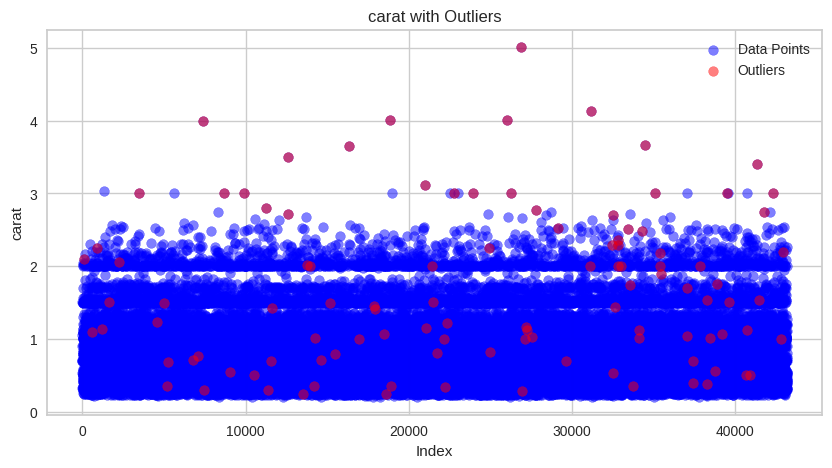

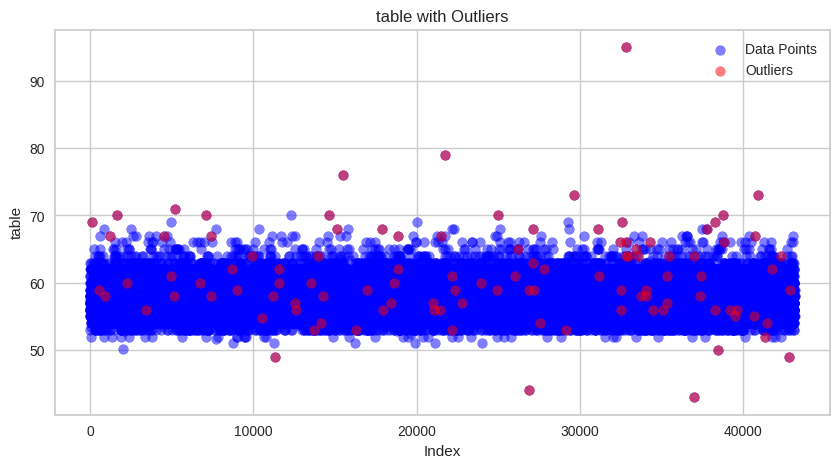

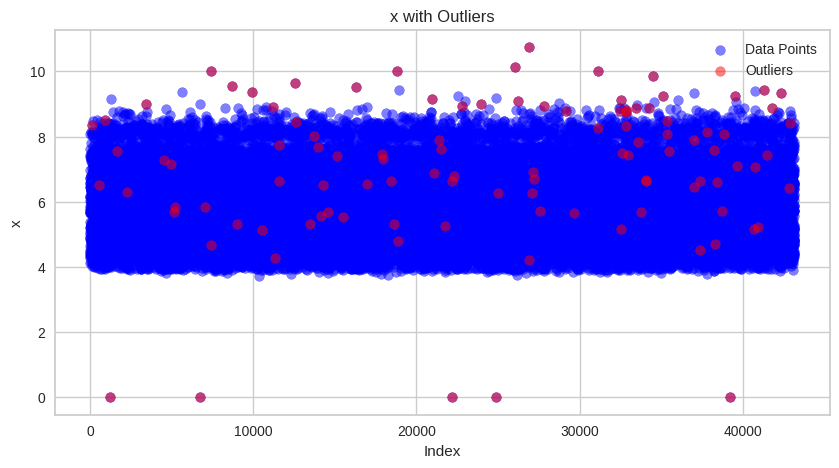

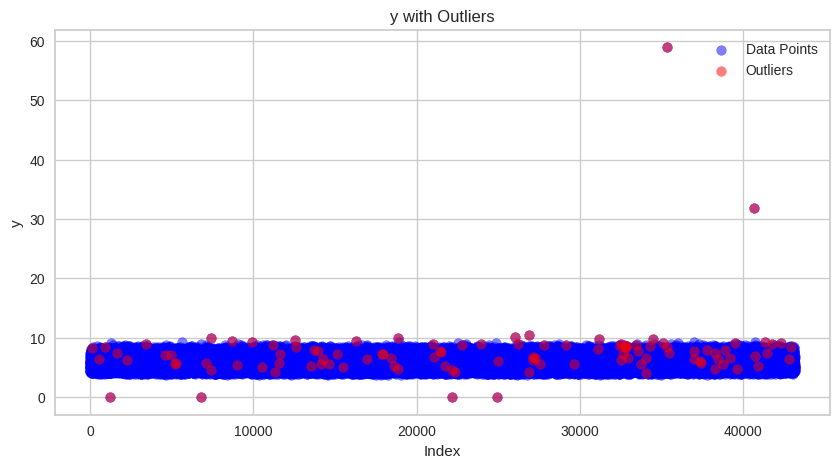

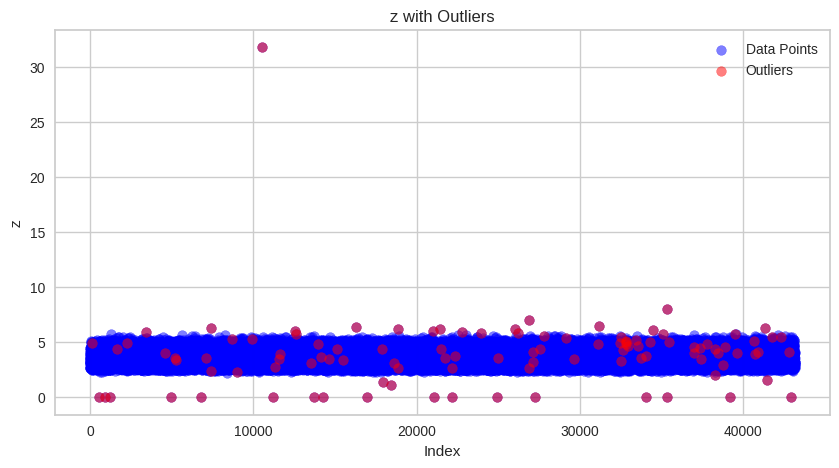

In [ ]:
for column in columns:
    plot_feature_with_outliers(df_HP6, column, outliers)


In [ ]:
data_no_outliers = df_HP6.drop(outliers)

In [ ]:
data_no_outliers.head()

,carat,cut,color,clarity,table,price,x,y,z
0,1.06,Ideal,I,SI2,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,57.0,2596,5.76,5.72,3.50


In [ ]:
# Train pycaret models

# Custom label encoding
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Apply the custom label encoding
data_no_outliers_LE = pd.DataFrame(data_no_outliers)
data_no_outliers_LE['cut'] = data_no_outliers['cut'].map(cut_mapping)
data_no_outliers_LE['color'] = data_no_outliers['color'].map(color_mapping)
data_no_outliers_LE['clarity'] = data_no_outliers['clarity'].map(clarity_mapping)


In [ ]:
data_no_outliers_LE.head()

,carat,cut,color,clarity,table,price,x,y,z
0,1.06,4,1,1,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,5,58.0,15164,7.38,7.42,4.51
2,0.32,4,4,3,56.0,828,4.43,4.41,2.71
3,0.53,4,3,3,56.0,1577,5.19,5.22,3.19
4,0.70,3,2,5,57.0,2596,5.76,5.72,3.50


In [ ]:
s_hp6 = setup(data_no_outliers_LE, target='price', normalize=True ,normalize_method='minmax')

best = compare_models()

,Description,Value
0,Session id,4440
1,Target,price
2,Target type,Regression
3,Original data shape,"(43045, 9)"
4,Transformed data shape,"(43045, 9)"
5,Transformed train set shape,"(30131, 9)"
6,Transformed test set shape,"(12914, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,278.2793,275365.4817,524.3827,0.9824,0.1056,0.0812,0.5320
xgboost,Extreme Gradient Boosting,277.5584,293311.1862,541.4355,0.9812,0.0955,0.0719,2.0980
et,Extra Trees Regressor,270.4645,294262.3053,542.2577,0.9812,0.0927,0.0672,7.1860
rf,Random Forest Regressor,271.9747,296958.3661,544.6462,0.9810,0.0917,0.0664,9.6250
gbr,Gradient Boosting Regressor,337.6885,364680.6071,603.4356,0.9767,0.1560,0.1080,2.6250
knn,K Neighbors Regressor,345.3538,455664.8641,674.4366,0.9708,0.1249,0.0945,0.1930
dt,Decision Tree Regressor,366.7952,553535.5231,743.5346,0.9646,0.1262,0.0885,0.2280
ada,AdaBoost Regressor,845.7841,1247354.4253,1115.8710,0.9202,0.3999,0.4146,1.5380
br,Bayesian Ridge,775.5125,1332885.9813,1153.8971,0.9147,0.6568,0.4239,0.1210
lr,Linear Regression,775.5258,1332886.0812,1153.8970,0.9147,0.6565,0.4239,0.4570


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,288.9886,294198.2157,542.4004,0.9818,0.1071,0.0820


,carat,cut,color,clarity,table,x,y,z,price,prediction_label
31957,2.02,4,2,1,56.0,8.13,8.09,5.04,12485,14358.856108
9030,1.55,4,4,3,54.0,7.44,7.48,4.61,15426,15246.024534
14859,0.54,4,2,2,56.0,5.24,5.28,3.21,1154,1317.589288
21108,0.68,3,2,2,59.0,5.77,5.73,3.42,1666,2044.686337
37432,0.46,3,3,2,59.0,5.04,5.00,3.04,1063,1035.356781
...,...,...,...,...,...,...,...,...,...,...
18574,0.37,4,1,7,56.0,4.64,4.68,2.83,754,845.515547
27935,0.96,2,5,3,58.0,6.47,6.51,3.81,5997,5472.542351
24442,0.77,4,6,1,56.0,5.83,5.89,3.64,2896,2771.049258
605,0.40,2,5,3,60.0,4.81,4.84,2.85,814,1038.285039


In [ ]:
test_hp6=test.copy()
test_hp6.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
test_hp6.drop(columns='depth',axis=1,inplace=True)
test_hp6.drop(columns='Id',axis=1,inplace=True)

cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

test_hp6_LE = pd.DataFrame(test_hp6)
test_hp6_LE['cut'] = test_hp6_LE['cut'].map(cut_mapping)
test_hp6_LE['color'] = test_hp6_LE['color'].map(color_mapping)
test_hp6_LE['clarity'] = test_hp6_LE['clarity'].map(clarity_mapping)

In [ ]:
unseen_predictions = predict_model(best, data=test_hp6_LE)
price_predictions = unseen_predictions['prediction_label']
price_predictions_df = price_predictions.to_frame()
price_predictions_df.to_csv('predicted_prices.csv', index=True)


In [ ]:
# remove outliers not give abetter performance!
# but it normalize the data, and the standerd scaler give better results than minmax scaler

# Tune 7 


In [ ]:
df_TW = df.copy()
df_TW.head()

cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

df_TW_LE = pd.DataFrame(df_TW)
df_TW_LE['cut'] = df_TW_LE['cut'].map(cut_mapping)
df_TW_LE['color'] = df_TW_LE['color'].map(color_mapping)
df_TW_LE['clarity'] = df_TW_LE['clarity'].map(clarity_mapping)

df_TW_cluster = df_TW_LE.drop(columns='price',axis=1)
df_TW_cluster.head()

# Set up the PyCaret environment
from sklearn.cluster import KMeans

num_clusters = 4
kmeans_model = KMeans(n_clusters=num_clusters)
kmeans_model.fit(df_TW_cluster)

data_clusters = kmeans_model.predict(df_TW_cluster)
data_clusters

df_TW['cluster'] = data_clusters
df_TW.head()

df_TW.drop(columns='depth',axis=1,inplace=True)

from pycaret.regression import *

s_TW = setup(df_TW, target='price', normalize=True ,normalize_method='minmax')

best = compare_models()

predict_model(best)

test = pd.read_csv('/content/test.csv')
test_TW=test.copy()
test_TW.head()
test_TW.drop(columns='Id',axis=1,inplace=True)

cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

test_TW_LE = pd.DataFrame(test_TW)
test_TW_LE['cut'] = test_TW_LE['cut'].map(cut_mapping)
test_TW_LE['color'] = test_TW_LE['color'].map(color_mapping)
test_TW_LE['clarity'] = test_TW_LE['clarity'].map(clarity_mapping)

cluster_test = kmeans_model.predict(test_TW_LE)

test_TW_LE['cluster']  = cluster_test

test_TW_LE.drop(columns='depth',axis=1,inplace=True)

unseen_predictions = predict_model(best, data=test_TW_LE)
price_predictions = unseen_predictions['prediction_label']
price_predictions_df = price_predictions.to_frame()
price_predictions_df.to_csv('predicted_prices.csv', index=True)


its not give a better Result, it took each value and cluster it!

#Final Tune

In [ ]:
df_HPF = df.copy()
df_HPF.drop(columns='depth',axis=1,inplace=True)
df_HPF.drop(columns='price_log',axis=1,inplace=True)

In [ ]:
df_HPF.head(1)

,carat,cut,color,clarity,table,price,x,y,z
0,1.06,Ideal,I,SI2,57.0,4270,6.57,6.6,4.07


In [ ]:
# Train pycaret models

# Custom label encoding
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Apply the custom label encoding
df_HPF_LE = pd.DataFrame(df_HPF)
df_HPF_LE['cut'] = df_HPF_LE['cut'].map(cut_mapping)
df_HPF_LE['color'] = df_HPF_LE['color'].map(color_mapping)
df_HPF_LE['clarity'] = df_HPF_LE['clarity'].map(clarity_mapping)


In [ ]:
final = setup(df_HPF_LE, target='price', normalize=True ,normalize_method='minmax')

lightgbm = create_model('lightgbm')

,Description,Value
0,Session id,2636
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 9)"
4,Transformed data shape,"(43152, 9)"
5,Transformed train set shape,"(30206, 9)"
6,Transformed test set shape,"(12946, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,286.9451,303085.8225,550.5323,0.9801,0.1088,0.0827
1,290.0069,301946.3406,549.4964,0.9812,0.1076,0.0837
2,283.5163,294754.8663,542.9133,0.9822,0.1063,0.0802
3,296.5508,329977.6172,574.4368,0.9793,0.1075,0.0828
4,289.5010,293405.6227,541.6693,0.9831,0.1118,0.0831
5,279.9539,263057.9566,512.8918,0.9838,0.1058,0.0826
6,290.3499,303803.8057,551.1840,0.9807,0.1083,0.0837
7,278.3515,265873.8235,515.6295,0.9830,0.1087,0.0827
8,276.0847,310378.1412,557.1159,0.9788,0.1095,0.0816


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,286.7447,305246.3490,552.4910,0.9800,0.1097,0.0830
1,292.1560,314255.7263,560.5852,0.9805,0.1077,0.0840
2,288.5952,306547.7563,553.6676,0.9815,0.1071,0.0809
3,299.3518,349827.0766,591.4618,0.9780,0.1069,0.0823
4,294.9439,312130.2432,558.6862,0.9820,0.1160,0.0836
5,278.8307,266915.8741,516.6390,0.9836,0.1060,0.0829
6,287.3032,301422.5605,549.0196,0.9809,0.1065,0.0826
7,275.7314,267806.3953,517.5001,0.9829,0.1063,0.0812
8,277.6359,293630.4967,541.8768,0.9800,0.1086,0.0827


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
best_model = automl(optimize='RMSE')

In [ ]:
print("Tuned LightGBM Model Performance:")
print(tuned_lightgbm)
print("\nBest Model Performance:")
print(best_model)

Tuned LightGBM Model Performance:
LGBMRegressor(random_state=2636)

Best Model Performance:
LGBMRegressor(random_state=2636)


In [ ]:
unseen_predictions = predict_model(best_model, data=test_hp6_LE)
price_predictions = unseen_predictions['prediction_label']
price_predictions_df = price_predictions.to_frame()
price_predictions_df.to_csv('predicted_prices.csv', index=True)


The best model is Tune 3 model, which give best RMSE score in the compitetion

# Final model selection

In [ ]:
df_F = df.copy()
df_F.drop(columns='depth',axis=1,inplace=True)
df_F.drop(columns='price_log',axis=1,inplace=True)

In [ ]:
# Custom label encoding
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Apply the custom label encoding
df_F_LE = pd.DataFrame(df_F)
df_F_LE['cut'] = df_F_LE['cut'].map(cut_mapping)
df_F_LE['color'] = df_F_LE['color'].map(color_mapping)
df_F_LE['clarity'] = df_F_LE['clarity'].map(clarity_mapping)


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Set up the regression environment
regression_setup = setup(data=df_F_LE, target='price', normalize=True, normalize_method='minmax')

# Create the LightGBM model
lightgbm = create_model('lightgbm')

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [225],
    'max_depth': [ 10],
    'learning_rate': [0.1],
    'num_leaves': [60],
    'reg_alpha': [0.33],
    'reg_lambda': [0.01],
    'subsample': [0.29],
    'colsample_bytree': [ 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LGBMRegressor(random_state=0), param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)




,Description,Value
0,Session id,5521
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 9)"
4,Transformed data shape,"(43152, 9)"
5,Transformed train set shape,"(30206, 9)"
6,Transformed test set shape,"(12946, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,277.0592,279348.3855,528.5342,0.9823,0.1054,0.0822
1,298.1005,313604.5008,560.0040,0.9815,0.1069,0.0838
2,280.7382,296837.1120,544.8276,0.9803,0.1084,0.0838
3,276.1280,280306.6688,529.4400,0.9823,0.1038,0.0793
4,288.1654,320915.5308,566.4941,0.9794,0.1129,0.0838
5,280.9045,291859.2846,540.2400,0.9820,0.1071,0.0824
6,294.6204,338130.8831,581.4902,0.9787,0.1086,0.0836
7,280.8864,276102.7387,525.4548,0.9824,0.1093,0.0844
8,294.5030,337732.3881,581.1475,0.9784,0.1113,0.0839


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
X = df_F_LE.drop(columns=['price'])
y = df_F_LE['price']
# Fit the grid search to the training data
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 225, 'num_leaves': 60, 'reg_alpha': 0.33, 'reg_lambda': 0.01, 'subsample': 0.29}
Best RMSE: 534.8698635619005


In [ ]:
# Tuned Model
# Define the hyperparameters to use
params = {
    'n_estimators': 225,
    'max_depth': 10,
    'learning_rate': 0.1,
    'num_leaves': 60,
    'reg_alpha': 0.33,
    'reg_lambda': 0.01,
    'subsample': 0.29,
    'colsample_bytree': 1.0
}

# Create the LightGBM model with the specified hyperparameters
model = LGBMRegressor(**params)

# Train the model on the training data
model.fit(X, y)


LGBMRegressor(max_depth=10, n_estimators=225, num_leaves=60, reg_alpha=0.33,
              reg_lambda=0.01, subsample=0.29)

In [ ]:
test_F=test.copy()
test_F.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
test_F.drop(columns='depth',axis=1,inplace=True)
test_F.drop(columns='Id',axis=1,inplace=True)

cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

test_F_LE = pd.DataFrame(test_F)
test_F_LE['cut'] = test_F_LE['cut'].map(cut_mapping)
test_F_LE['color'] = test_F_LE['color'].map(color_mapping)
test_F_LE['clarity'] = test_F_LE['clarity'].map(clarity_mapping)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(test_F_LE)

In [ ]:
# Create a DataFrame to save the predictions
df_pred = pd.DataFrame({'Id': np.arange(1,len(y_pred)+1), 'price': y_pred})

# Print the first few rows of the predicted DataFrame
print(df_pred.head())

# Save the predicted DataFrame to a CSV file
df_pred.to_csv('predictions.csv', index=False)

   Id        price
0   1   915.280929
1   2  2832.824754
2   3   776.825195
3   4  2842.229125
4   5  1148.469146


In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
model = joblib.load('model.pkl')

In [ ]:
# Test prediction
# enter input
carat = 1.06
cut = 'Ideal'
color = 'I'
clarity = 'SI2'
depth = 61.8
table = 57.0
x = 6.57
y = 6.6
z = 4.07

input_data = pd.DataFrame({'carat': [carat], 'cut': [cut], 'color': [color], 'clarity': [clarity], 'table': [table], 'x': [x], 'y': [y], 'z': [z]})

cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

input_data_LE = pd.DataFrame(input_data)
input_data_LE['cut'] = input_data_LE['cut'].map(cut_mapping)
input_data_LE['color'] = input_data_LE['color'].map(color_mapping)
input_data_LE['clarity'] = input_data_LE['clarity'].map(clarity_mapping)

# Make a prediction with the trained model
prediction = model.predict(input_data_LE)
print(prediction)

[4147.8795048]


In [ ]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_log
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.6,4.07,8.359603


# Deploy using Streamlit

In [ ]:
!pip install streamlit

In [ ]:
# to run the streamlit
!pip install pyngrok

In [ ]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_log
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.6,4.07,8.359603


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('model.pkl')

# Define the Streamlit application
def main():
    st.title('DIAMOND Prediction App')
# features 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y','z']  
    # Get input from the user
    carat = st.number_input('Enter the value of carat, ex:value=1.06', value=1.06)
    cut = st.text_input('Enter the value of cut, ex:value=Ideal', value='Ideal')
    color = st.text_input('Enter the value of color, ex:I', value='I')
    clarity = st.text_input('Enter the value of clarity, ex:SI2', value='SI2')
    depth = st.number_input('Enter the value of depth, ex:value=61.8', value=61.8)
    table = st.number_input('Enter the value of table, ex:value=57.0', value=57.0)
    x = st.number_input('Enter the value of x, ex:value=6.57', value=6.57)
    y = st.number_input('Enter the value of y, ex:value=6.6', value=6.6)
    z = st.number_input('Enter the value of z, , ex:value=4.07', value=4.07)
    
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({'carat': [carat], 'cut': [cut], 'color': [color], 'clarity': [clarity], 'table': [table], 'x': [x], 'y': [y], 'z': [z]})

    cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
    color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
    clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

    input_data_LE = pd.DataFrame(input_data)
    input_data_LE['cut'] = input_data_LE['cut'].map(cut_mapping)
    input_data_LE['color'] = input_data_LE['color'].map(color_mapping)
    input_data_LE['clarity'] = input_data_LE['clarity'].map(clarity_mapping)

    # Make a prediction with the trained model
    prediction = model.predict(input_data_LE)
    
    # Display the prediction
    st.write(f'The predicted class is: {prediction[0]}')




Writing app.py


In [ ]:
# Run the Streamlit application
if __name__ == '__main__':
    main()

In [ ]:
!pip install pyngrok --quiet

In [ ]:
from pyngrok import ngrok
import os

# Set the STREAMLIT_SERVER_PORT environment variable
os.environ["STREAMLIT_SERVER_PORT"] = "8501"

# Start a new ngrok tunnel
public_url = ngrok.connect(8501, bind_tls=True)
print("Your Streamlit app is available at:", public_url)

!streamlit run app.py --server.port 8501 &>/dev/null &

Your Streamlit app is available at: NgrokTunnel: "https://71f5-34-73-32-175.ngrok.io" -> "http://localhost:8501"


# Result confidance

In [ ]:
df.price.min()

326

In [ ]:
df.price.max()

18823

In [ ]:
df.price.mean()

3929.491912309974

In [ ]:
530/3929

0.13489437515907354

In [ ]:
# Error 13.5%
# this mean if the price 1000 then the model result be in this range ->
print("min value",1000-1000*0.135)
print("max value",1000+1000*0.135)

min value 865.0
max value 1135.0
